In [48]:
import pandas as pd
import matplotlib.pyplot as plt

## Load and filter 

In [49]:
df = pd.read_csv('output/training_logs.csv')
# df = df[]

# shorten all runs to max 30 epochs
df = df[df['Epoch']<=30]

# drop all runs which have less than 3 epochs
df = df.groupby(['model', 'timestamp']).filter(lambda x: len(x)>=3)
df

,timestamp,model,Training Loss,Epoch,Step,Validation Loss,Accuracy,F1,model_path,samples_per_s,steps_per_s,colab,per_device_train_batch_size,per_device_eval_batch_size,split,target_map,binary,balanced
0,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.965,1.0,254,0.749,0.698,0.457,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
1,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.738,2.0,508,1.252,0.420,0.345,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
2,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.492,3.0,762,0.978,0.636,0.448,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
3,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.288,4.0,1016,2.421,0.501,0.388,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
4,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.172,5.0,1270,2.449,0.558,0.413,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
5,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.100,6.0,1524,2.501,0.608,0.434,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
6,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.054,7.0,1778,3.139,0.548,0.407,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
7,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.036,8.0,2032,3.157,0.570,0.418,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
8,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.014,9.0,2286,3.654,0.527,0.399,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
9,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.006,10.0,2540,3.603,0.533,0.401,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True


In [50]:
last_n_runs = 2

best = df.groupby(['model', 'timestamp'])['F1'].max()
best

# timestamp.sort_values(ascending=False).unique()[:last_n_runs]
# grouped = df[df['timestamp'].isin(last_n)].groupby(['model', 'timestamp'])
# 
# # Individual subplots
# fig, axes = plt.subplots(nrows=len(grouped.groups), ncols=1, figsize=(20, 10))
# for (group_name, group_df), ax in zip(grouped, axes):
#     group_df.plot(y=['Accuracy', 'F1', 'Training Loss', 'Validation Loss'], x='Epoch', ax=ax, title=f"{group_name}").legend(loc='upper left')
# 
# plt.tight_layout()
# plt.suptitle("Subplots")
# plt.show()

model                                  timestamp       
distilbert-base-uncased                2024-04-14_21-48    0.434
                                       2024-04-14_21-57    0.680
                                       2024-04-14_22-05    0.619
michellejieli/emotion_text_classifier  2024-04-14_21-14    0.457
                                       2024-04-14_21-22    0.671
                                       2024-04-14_21-31    0.625
Name: F1, dtype: float64

## Check latest

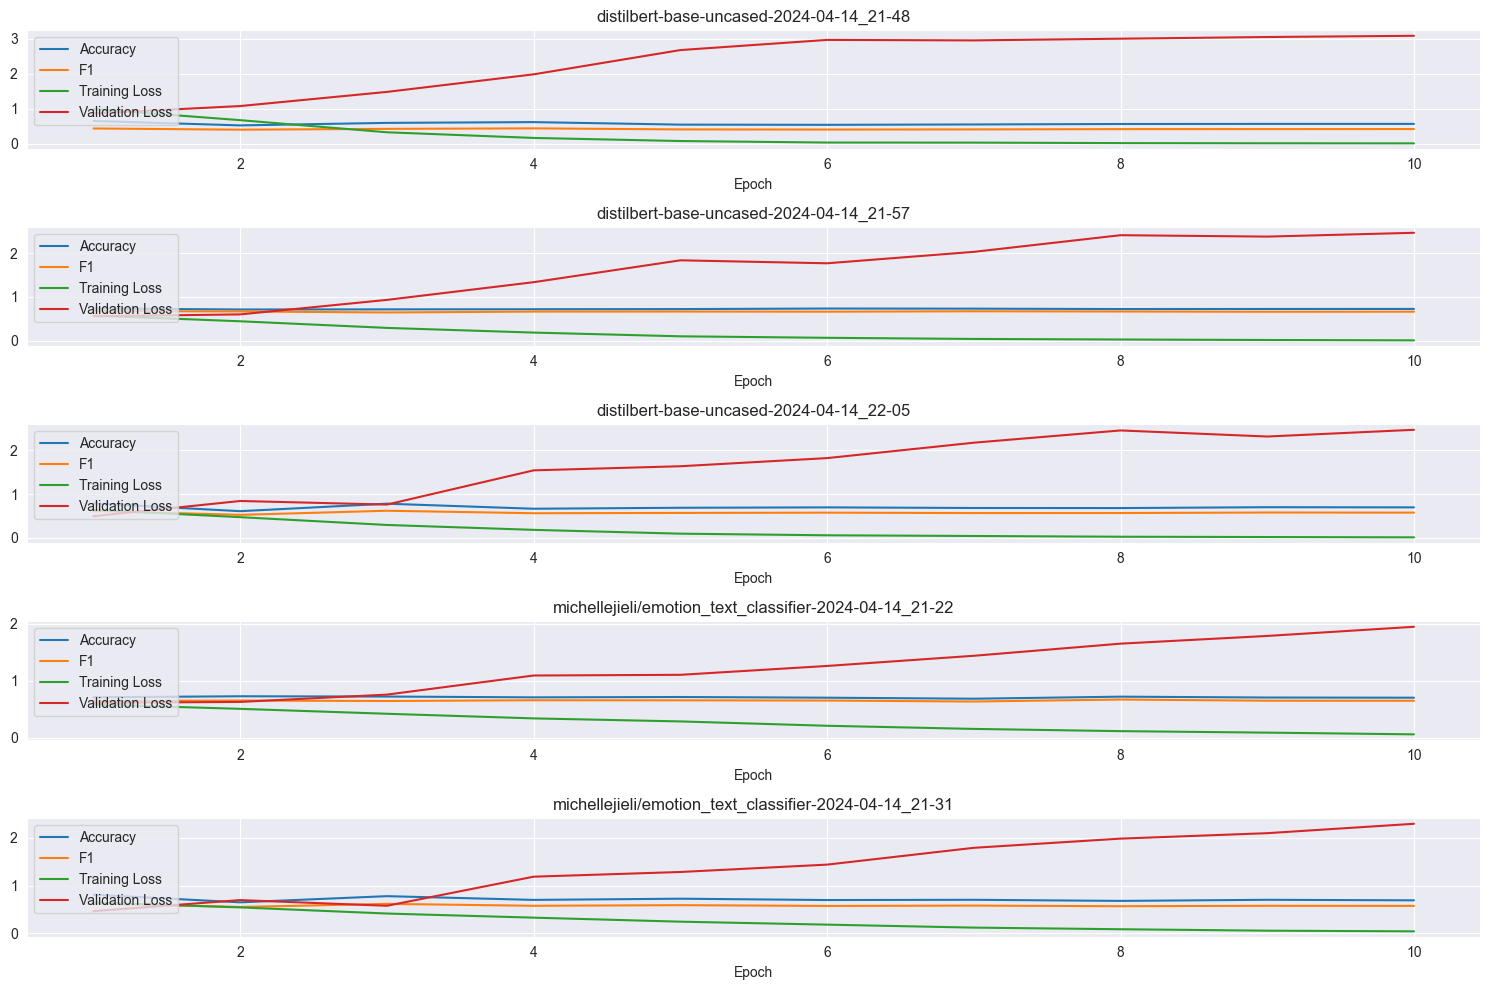

In [51]:
last_n_runs = 5

# pd.to_datetime(df.timestamp, format="%Y-%m-%d_%H-%M").sort_values(ascending=False).unique()
last_n = df.timestamp.sort_values(ascending=False).unique()[:last_n_runs]
grouped = df[df['timestamp'].isin(last_n)].groupby(['model', 'timestamp'])

# Individual subplots
fig, axes = plt.subplots(nrows=len(grouped.groups), ncols=1, figsize=(15, 10))
for (group_name, group_df), ax in zip(grouped, axes):
    group_df.plot(y=['Accuracy', 'F1', 'Training Loss', 'Validation Loss'], x='Epoch', ax=ax, title=f"{"-".join(group_name)}").legend(loc='upper left')

plt.tight_layout()
plt.show()

# Plot all

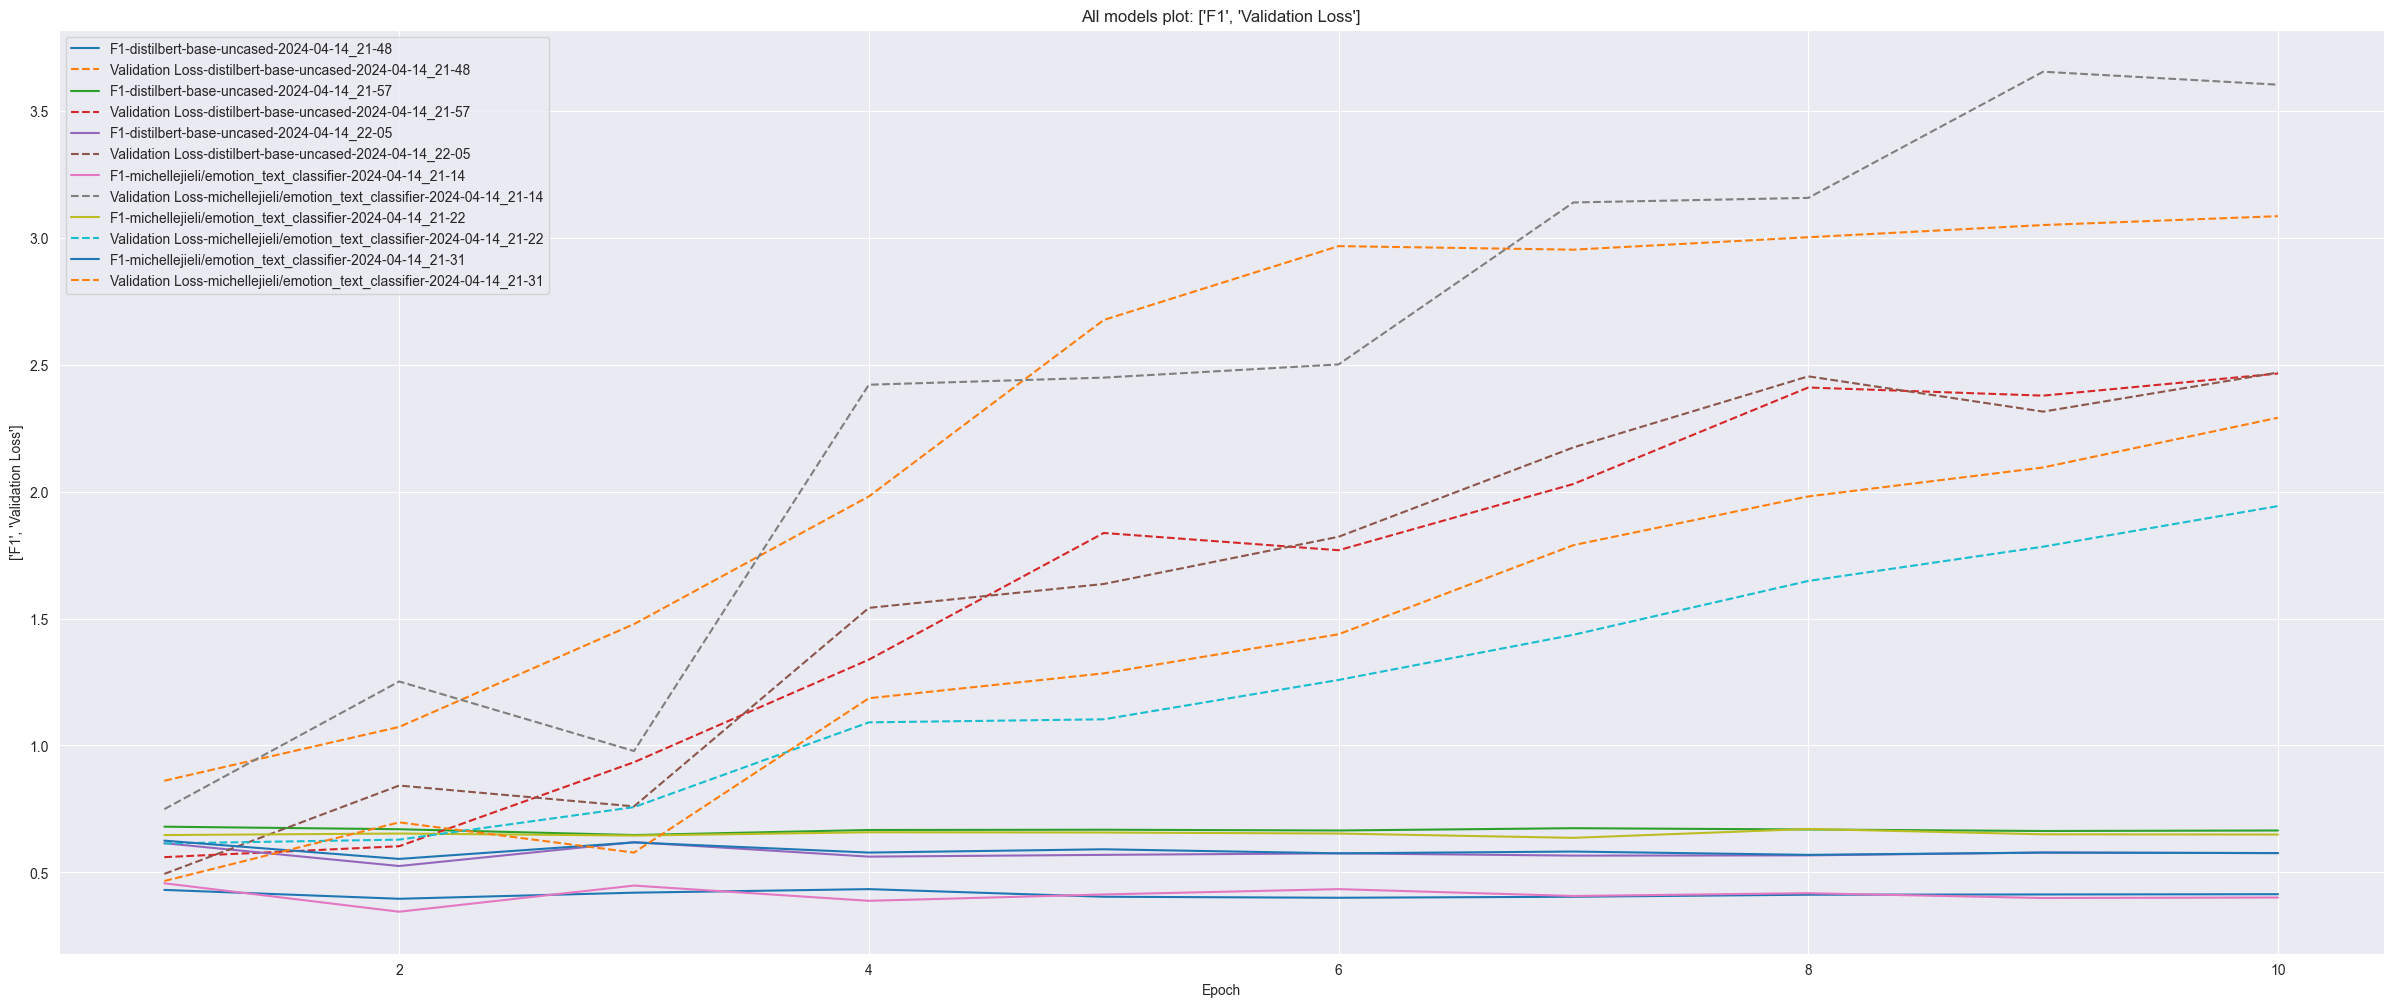

In [52]:
col_to_plot = ['F1', 'Validation Loss']
grouped = df.groupby(['model', 'timestamp'])

plt.figure(figsize=(30,12))
for name, group_df in grouped:
    ls = ['solid', 'dashed', 'dashdot', 'dotted']
    for i, col in enumerate(col_to_plot):
        plt.plot(group_df['Epoch'], group_df[col], label=f'{col}-{"-".join(name)}', linestyle=ls[i])

plt.xlabel('Epoch')
plt.ylabel(col_to_plot)
plt.title(f'All models plot: {col_to_plot}')
plt.legend()
plt.show()